In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the datasets
unemployment_data_1 = pd.read_csv("Unemployment in India.csv")
unemployment_data_2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [17]:
#Checking the dataset
unemployment_data_1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
#Checking another Dataset
unemployment_data_2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
#Removing white spaces from columns from start and end int both datasets
unemployment_data_1.columns = unemployment_data_1.columns.str.strip()
unemployment_data_2.columns = unemployment_data_2.columns.str.strip()

In [7]:
#Removing white spaces from whole dataset from start and end int both datasets
unemployment_data_1 = unemployment_data_1.applymap(lambda x: x.strip() if isinstance(x, str) else x)
unemployment_data_2 = unemployment_data_2.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\hp\AppData\Local\Temp\ipykernel_824\1479510620.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  unemployment_data_1 = unemployment_data_1.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\hp\AppData\Local\Temp\ipykernel_824\1479510620.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  unemployment_data_2 = unemployment_data_2.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:
#Checking and parsing dates
unemployment_data_1['Date'] = pd.to_datetime(unemployment_data_1['Date'], format='%d-%m-%Y', dayfirst=True)
unemployment_data_2['Date'] = pd.to_datetime(unemployment_data_2['Date'], format='%d-%m-%Y', dayfirst=True)

In [9]:
#Merging Both datasets and taking required columns
merged_data = pd.merge(unemployment_data_1, 
                       unemployment_data_2.drop(columns=['Region.1', 'longitude', 'latitude']), 
                       on=['Region', 'Date', 'Frequency'], 
                       how='outer',
                       suffixes=('_1', '_2'))

In [10]:
#Cleaning and dropping missing values

merged_data['Estimated Unemployment Rate (%)'] = merged_data['Estimated Unemployment Rate (%)_1'].combine_first(merged_data['Estimated Unemployment Rate (%)_2'])
merged_data.drop(columns=['Estimated Unemployment Rate (%)_1', 'Estimated Unemployment Rate (%)_2'], inplace=True)

In [11]:
#Taking stats analysis
print("Basic Statistics:")
print(merged_data['Estimated Unemployment Rate (%)'].describe())

Basic Statistics:
count    1007.000000
mean       11.906991
std        10.739549
min         0.000000
25%         4.685000
50%         8.890000
75%        16.125000
max        76.740000
Name: Estimated Unemployment Rate (%), dtype: float64


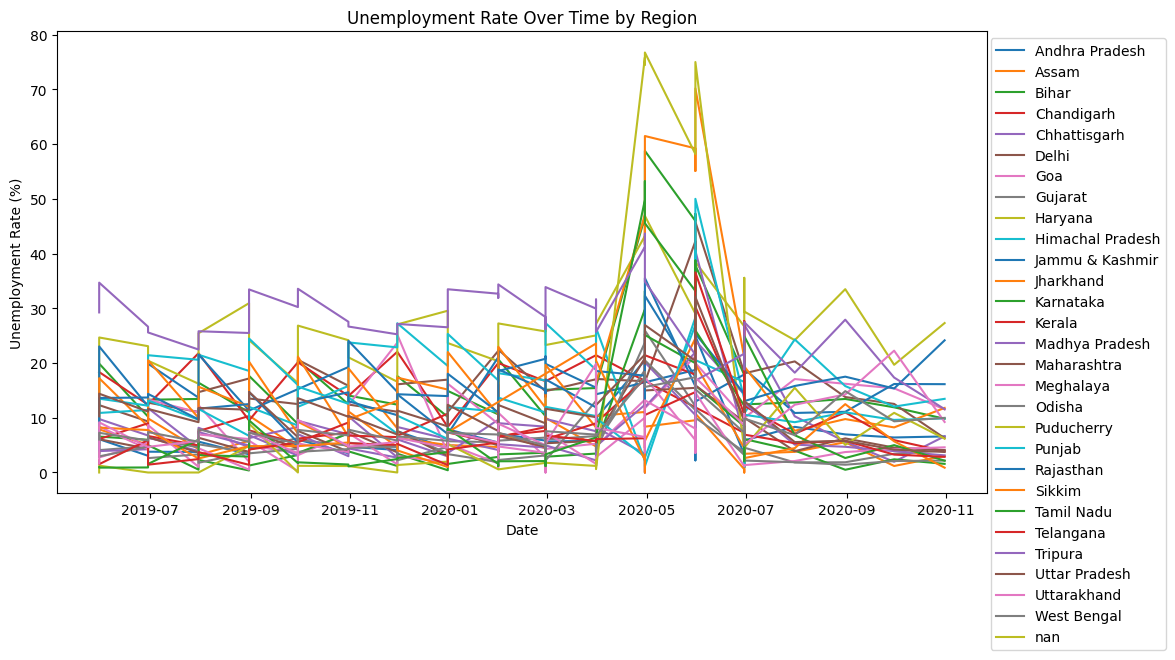

In [15]:
#Estimating unemployment rate over time

plt.figure(figsize=(12, 6))
for region in merged_data['Region'].unique():
    regional_data = merged_data[merged_data['Region'] == region]
    plt.plot(regional_data['Date'], regional_data['Estimated Unemployment Rate (%)'], label=region)

plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time by Region')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

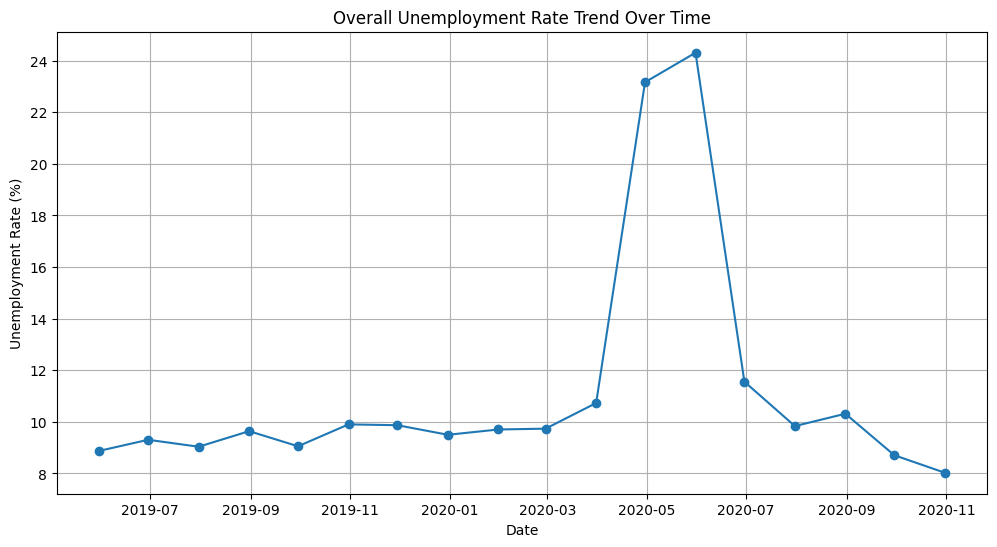

In [16]:
#Overall unemployment over the trend
overall_trend = merged_data.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(overall_trend['Date'], overall_trend['Estimated Unemployment Rate (%)'], marker='o')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Overall Unemployment Rate Trend Over Time')
plt.grid(True)
plt.show()